# First task is to resize each image to 224 * 224 resolution

Code:

In [ ]:
from PIL import Image
import os

# Define the target size
target_size = (224, 224)

# Define the folder path containing your images
folder_path = "/Users/arjun/Downloads/ninjacart_data/test/tomato"

# Loop through all files in the folder
for filename in os.listdir(folder_path):
  # Check if it's an image file
  if filename.lower().endswith((".jpg", ".jpeg", ".png")):
    # Open the image
    img = Image.open(os.path.join(folder_path, filename))
    
    # Resize the image with antialiasing for smoother scaling
    img = img.resize(target_size, Image.BICUBIC)
    
    # Save the resized image with the same filename (optional)
    img.save(os.path.join(folder_path, filename))

print("Images resized successfully!")


## Second Task is to train a Classification model on Google's Teachable Machine and Exporting the model. Here are some training metrics:

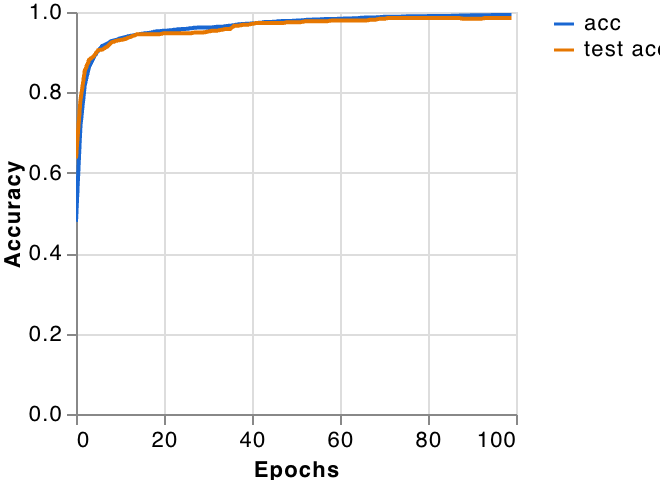

In [48]:
from PIL import Image

Image.open("/Users/arjun/Downloads/ninjacart_data/acc.png")

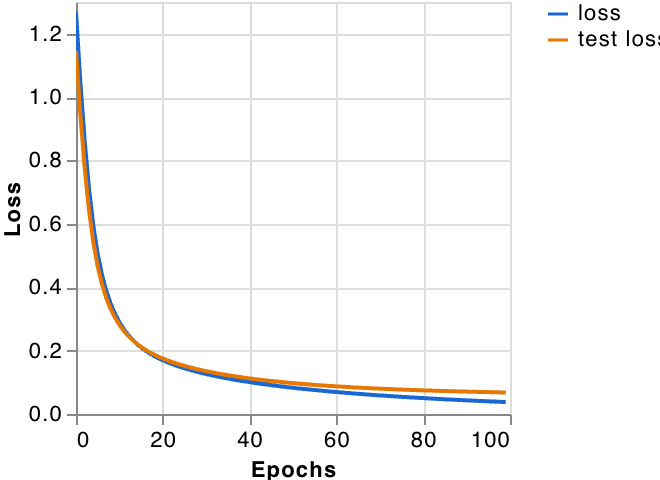

In [49]:
from PIL import Image

Image.open("/Users/arjun/Downloads/ninjacart_data/loss.png")

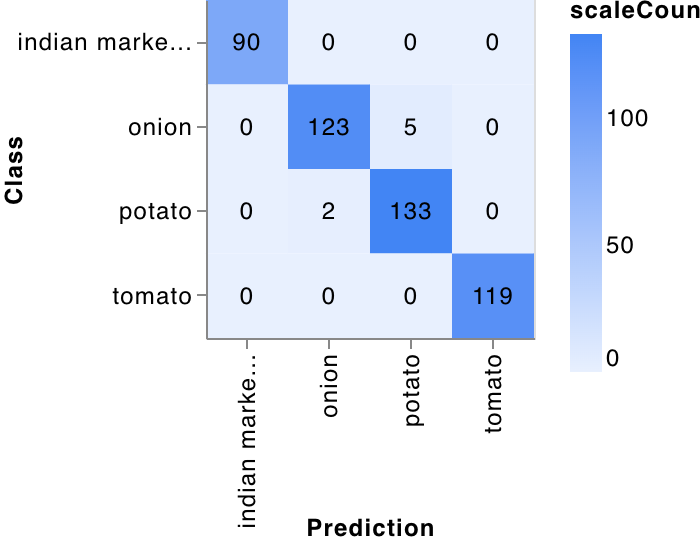

In [50]:
from PIL import Image

Image.open("/Users/arjun/Downloads/ninjacart_data/cof.png")

## Task three - Make Prediction on test data using Exported Model

In [46]:
import keras
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import os 
import warnings
warnings.filterwarnings('ignore')

class_names = ['indian market', 'onion', 'potato', 'tomato']

predicted_ans = []

original = []


fol = ['indian market', 'onion', 'potato', 'tomato']

for f  in fol:
    model = load_model("keras_model.h5", compile=False)
    folder = f"/Users/arjun/Downloads/ninjacart_data/test/{f}"

    file_paths = [os.path.join(folder, x) for x in os.listdir(folder)]
    # Define the number of images you want to predict
    num_images = len(file_paths)

    # Create an array to store the data for multiple images
    data = np.ndarray(shape=(num_images, 224, 224, 3), dtype=np.float32)


    # Loop through each image
    for i in range(num_images):
        # Replace "<IMAGE_PATH>" with the actual path to each image
        image = Image.open(file_paths[i]).convert("RGB")

        # Resize and crop the image
        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

        # Convert the image to a numpy array
        image_array = np.asarray(image)

        # Normalize the image
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

        # Load the normalized image into the data array
        data[i] = normalized_image_array

    # Predicts the model for the entire batch of images
    predictions = model.predict(data)

    # Iterate through each prediction in the batch
    for i in range(num_images):
        index = np.argmax(predictions[i])
        class_ = class_names[index]
        original.append(f'{f}')
        # Print prediction and confidence score for each image
        predicted_ans.append(class_)


4/4 [==============================] - 1s 56ms/step


In [47]:
from sklearn.metrics import classification_report

print(classification_report(original, predicted_ans))

               precision    recall  f1-score   support

indian market       0.99      0.85      0.91        81
        onion       0.77      0.95      0.85        83
       potato       0.90      0.81      0.86        81
       tomato       1.00      1.00      1.00       106

     accuracy                           0.91       351
    macro avg       0.92      0.90      0.91       351
 weighted avg       0.92      0.91      0.91       351



### So we have 91% Model Accuracy